## Fuente de datos
### MT560
* Recopilación de diferentes corpus en inglés a un idioma de destino.
* La recopilación de este corpus tiene las siguientes fuentes para diferentes idiomas, el resto de información puede ser encontrado en: [MTData.recipes](https://github.com/thammegowda/016-many-eng-v2/blob/2bf3e75ce/data/mtdata.recipes.yml)

| Fuentes |
|-------|
| JW300 |
| OPUS100  |
| OPUSGnome |
| OPUSUbuntu |
| OPUS-bibleuedin |
| OPUS-wikimedia |

## Construcción del Corpus
### Variantes del quechua

| ISO 639-3 | Nombre                                  | País      | Oraciones | Tokens    |
|-----------|-----------------------------------------|-----------|-----------|-----------|
| QUZ       | Cusco Quechua                           | Perú      | 127,408   | 1,649,454 |
| QUY       | Ayacucho Quechua                        | Perú      | 113,702   | 1,402,781 |
| QVI       | Imbabura Highland Quichua               | Ecuador   | 50,527    | 672,711   |
| QUG       | Chimborazo Highland Quichua             | Ecuador   | 20,272    | 247,947   |
| QUW       | Tena Lowland Quichua                    | Ecuador   | 15,674    | 292,905   |

### Otras lenguas indígenas

| ISO 639-3 | Nombre              | País             | Oraciones | Tokens    |
|-----------|---------------------|------------------|-----------|-----------|
| YUA       | Yucateco            | México           | 168,299   | 3,524,830 |
| GUG       | Paraguayan Guaraní  | Paraguay         | 143,391   | 2,151,216 |
| TZO       | Tzotzil             | México           | 140,124   | 2,993,791 |
| AYM       | Aymara              | Bolivia/Perú     | 138,760   | 1,939,507 |
| MRI       | Maori               | Nueva Zelanda    | 62,963    | 2,151,493 |


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
basePath = "/content/drive/MyDrive/corpus_quechua"

## MT560

In [50]:
df = pd.read_csv(f"{basePath}/filtered_corpus.csv")

lang_names = {
    "quz": "Cusco\nQuechua",
    "quy": "Ayacucho\nQuechua",
    "qvi": "Imbabura Highland\nQuichua",
    "qug": "Chimborazo Highland\nQuichua",
    "quw": "Tena Lowland\nQuichua",
    "yua": "Yucateco",
    "gug": "Paraguayan\nGuaraní",
    "tzo": "Tzotzil",
    "aym": "Aymara",
    "mri": "Maori"
}

# Grupos
quechua_langs = {"quz", "quy", "qvi", "qug", "quw"}
other_langs = {"yua", "gug", "tzo", "aym", "mri"}

# Total
counts = df["ISO"].value_counts()

# Filtrado
quechua_counts = counts[counts.index.isin(quechua_langs)]
other_counts = counts[counts.index.isin(other_langs)]

quechua_counts.index = quechua_counts.index.map(lang_names)
other_counts.index = other_counts.index.map(lang_names)

# Ordenamiento
quechua_counts = quechua_counts.sort_values(ascending=False)
other_counts = other_counts.sort_values(ascending=False)

# Graficar
def plot_with_labels(data, title, color):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(data.index, data.values, color=color)
    plt.title(title)
    plt.xlabel("Name")
    plt.ylabel("Sentences")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f"{yval:,}",
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

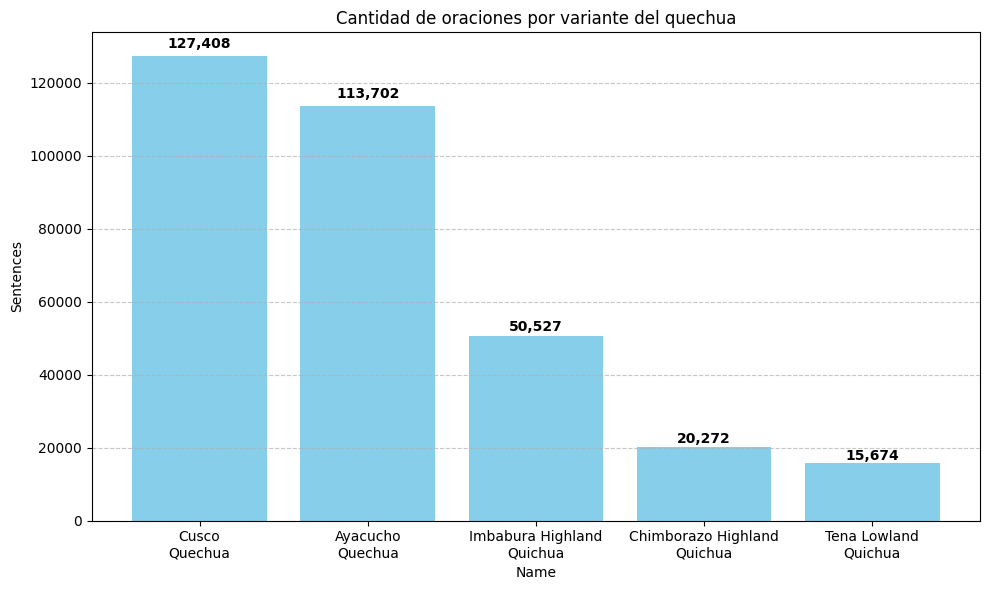

In [51]:
plot_with_labels(quechua_counts, "Cantidad de oraciones por variante del quechua", "skyblue")

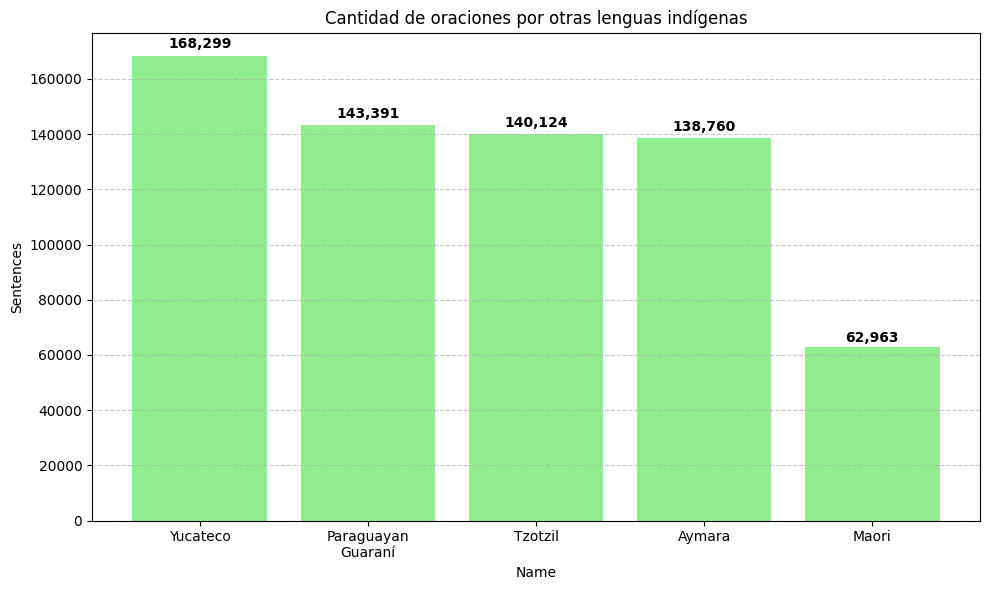

In [52]:
plot_with_labels(other_counts, "Cantidad de oraciones por otras lenguas indígenas", "lightgreen")

## One-Hot Encoding


In [53]:
langs = ["quz", "quy", "qvi", "qug", "quw", "yua", "gug", "tzo", "aym", "mri"]

result_df = pd.DataFrame()
result_df["Sentence"] = df["Sentence"]

# Filtrado 0,1
for lang in langs:
    result_df[lang] = (df["ISO"] == lang).astype(int)

result_df.to_csv((f"{basePath}/labeled_corpus.csv"), index=False, encoding="utf-8")

In [54]:
df_labeled = pd.read_csv(f"{basePath}/labeled_corpus.csv")

# Conteo y verificación del resultante
langs = ["quz", "quy", "qvi", "qug", "quw", "yua", "gug", "tzo", "aym", "mri"]
counts_labeled = df_labeled[langs].sum().astype(int).sort_values(ascending=False)

print(counts_labeled.to_string())

yua    168299
gug    143391
tzo    140124
aym    138760
quz    127408
quy    113702
mri     62963
qvi     50527
qug     20272
quw     15674
